In [770]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures


In [771]:
# Load the data into a pandas DataFrame
data = pd.read_csv("/content/dataframe_.csv")

In [772]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [773]:
data.isnull().sum()

input     1
output    1
dtype: int64

In [774]:
data["input"].fillna(0, inplace = True)
data["output"].fillna(0, inplace = True)

In [775]:
data.isnull().sum()

input     0
output    0
dtype: int64

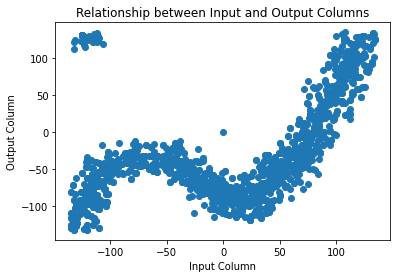

In [776]:
import matplotlib.pyplot as plt


# Plot a scatter plot of the relationship between the input and output columns
plt.scatter(data["input"], data["output"])
plt.xlabel("Input Column")
plt.ylabel("Output Column")
plt.title("Relationship between Input and Output Columns")
plt.show()

In [777]:
# Outlier Detection and Treatment
# Remove rows with extreme values in the input and output columns
z = np.abs(stats.zscore(data))
data = data[(z < 3).all(axis=1)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


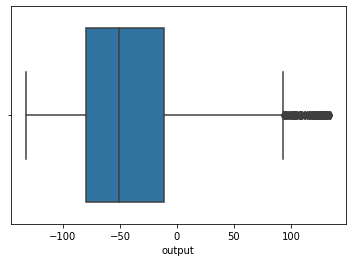

In [778]:
import seaborn as sns
sns.boxplot(data['output'])

In [779]:
Q1=data.output.quantile(0.25)
Q3=data.output.quantile(0.75)
IQR=Q3-Q1
print(IQR)
print(data.output.quantile(0.50))

69.02676665
-50.37684999


In [780]:
# Upper bound
upper = np.where(data['output'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['output'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

New Shape:  (1553, 2)


In [781]:
# Feature Engineering
# Add a new column that is the square of the input column
data["input_column_squared"] = data["input"] ** 2

In [782]:
# Split the data into input and output columns
X = data[["input", "input_column_squared"]]
y = data["output"]

In [783]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)



In [784]:
# Create two pipelines: one that uses linear regression and one that uses polynomial regression
pipe1 = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

pipe2 = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", PolynomialFeatures(degree=6)),
    ("linear_reg", LinearRegression())
])

In [785]:
# Train the models on the training data
pipe1.fit(X_train, y_train)
pipe2.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', PolynomialFeatures(degree=6)),
                ('linear_reg', LinearRegression())])

In [786]:
# Use the models to make predictions on the test data
y_pred1 = pipe1.predict(X_test)
y_pred2 = pipe2.predict(X_test)

In [787]:
# Evaluate the models' performance
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

print("Model 1 Mean Squared Error:", mse1)
print("Model 2 Mean Squared Error:", mse2)

if mse1 < mse2:
    print("Model 1 is better than Model 2")

Model 1 Mean Squared Error: 1101.1293101816325
Model 2 Mean Squared Error: 367.17854082994563


In [788]:
if mse1 < mse2:
    print("Model 1 is better than Model 2")
else:
    print("Model 2 is better than Model 1")

r2 = r2_score(y_test, y_pred1)
print(r2)
r2_ = r2_score(y_test, y_pred2)
print(r2_)

Model 2 is better than Model 1
0.5559289570821326
0.8519216988815611


In [789]:
import pickle
pickle.dump(pipe2, open('model1.pkl', 'wb'))

In [790]:
# load the model from disk
loaded_model = pickle.load(open('model1.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8519216988815611
